
# <center> R5.A.12 : TP4 - Vecteurs et valeurs propres </center>
<center> 2024/2025 - Thibault Godin & Lucie Naert </center>
<center> IUT de Vannes, BUT Informatique </center>



In [14]:
import networkx as nx
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.colors as cm

Fonctions permettant d'afficher des vecteurs. Ne pas hésiter à les utiliser.

In [15]:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter15.04-Eigenvalues-and-Eigenvectors-in-Python.html

#Fonctions d'affichages
def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (3, 3))
    plt.quiver(0,0,x[0],x[1],\
        color='k', angles='xy',\
        scale_units='xy',scale=1,\
        label='('+str(x[0])+','+str(x[1])+')')
    plt.quiver(0,0,b[0],b[1],\
        color = 'orange',angles='xy',\
        scale_units='xy',scale=1,\
        label ='('+str(b[0])+','+str(b[1])+')')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    


colors = [cm.to_hex(plt.cm.tab20(i)) for i in range(20)]

def plot_vects(vects, xlim, ylim):
    '''
    function to plot two vectors, 
    vects - list of vectors
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10,10))
    for i in range(len(vects)) :
        plt.quiver(0,0,vects[i][0],vects[i][1],\
        color=colors[i],angles='xy',\
        scale_units='xy',scale=1,\
        label='vector'+str(i))

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


## 1. Definition et premiers exemples 

On va commencer par quelques rappel sur les matrices, le produit matriciel et son interprétation géométrique.

Prenons une matrice et observons les effets géométrique du produit matriciel.

> __Question 1 (Effets géométriques)__ : utiliser `plot_vect` pour afficher, dans les 3 cellules suivantes, le vecteur `x` et ce même vecteur après multiplication avec la matrice `A`. Que remarquez-vous ? Parmi les vecteurs affichés, quels sont les vecteurs propres de `A` ? 

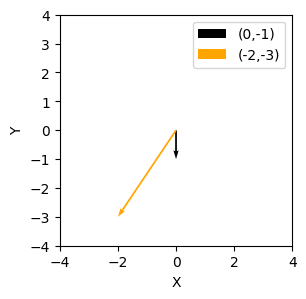

In [16]:
# Creating a sample matrix
A = np.array([[1,2],[4,3]])


x=np.array([0,-1])
plot_vect(x,A@x,(-4,4),(-4,4))

x=np.array([1,1])
#todo

x=np.array([1,2])
#todo

x=np.array([-1,1])
#todo



Réponse : TODO

### Vecteur propre, valeur propre

Si $A$ est une matrice, on dit que $v$ est un **vecteur propre à droite** associé à la valeur propre $\lambda$ si $Av = \lambda v$.

Si $A$ est une matrice, on dit que $u$ est un **vecteur propre à gauche** associé à la valeur propre $\lambda$ si $uA = \lambda u$.

> __Question 2 (numpy/linalg)__ : À l'aide de `numpy` et de son module `linalg`, retrouver les valeurs et vecteurs propres de la matrice $A$ précédente. Idem avec la matrice $B$ ci-dessous. Vérifier vos résultats graphiquement et par le calcul python

In [17]:
# Compute eigenvalues and eigenvectors
#todo

In [18]:
# Define a matrix
B = np.array([[5, 2], [2, 3]])
#todo

> __Question 3 (valeur propre)__ :
Écrire une fonction `eigenvec2val(A,v,isLeft)` qui, à partir d'une matrice `A` et de son vecteur propre `v` calcule et renvoie la valeur propre associée. `isLeft` est à `True` s'il s'agit d'un vecteur propre à gauche, `False` s'il s'agit d'un vecteur propre à droite (par défaut). 

In [19]:
def eigenvec2val(A,v, isLeft = False):
    return #todo


Soit la matrice $
M=
\begin{pmatrix}
0&1&2\\
2&1&0\\
2&2&2\\
\end{pmatrix}
$

> __Question 4__ : 
Vérifier par le calcul que $(3,2,5)$ est un vecteur propre à droite et donner la valeur propre associée.
Idem pour $(-6,-1,4)$ à gauche. À l'aide de `numpy` et de son module `linalg`, trouver les autres valeurs et vecteurs propres à droite.




In [20]:
M = np.array([[0,1,2], [2,1,0], [2,2,2]])
x=np.array([3,2,5])
#todo

x=np.array([-6,-1,4])
#todo

Deux vecteurs $u,v$ sont orthogonaux si $u^T . v = 0$

La formule suivante renvoie la projection de $v$ sur le vecteur orthogonal à $u$. Le vecteur $v_{\perp u}$ ainsi obtenu est orthogonal à $u$.

$$v_{\perp u} \leftarrow v - \frac{u.v^T}{(u^T.u)} u $$


(voir aussi [Algorithme de Gram-Schmidt](https://fr.wikipedia.org/wiki/Algorithme_de_Gram-Schmidt))

> __Question 5 (vecteurs orthogonaux)__ : 
Implémenter cette formule dans une fonction `ortho(u,v)` qui renvoie le projeté orthogonal de `v` selon `u`. On peut utiliser l'attribut `v.T` pour faire la transposée de `v`.


In [21]:
def ortho(u,v) :

    return #todo


u = np.array([1,1])
v = np.array([1,2])
plot_vects([u,v,v-ortho(u,v),ortho(u,v)],(-2,2),(-1,3))


try : 
    assert ortho(u,v).T@u == 0
    print("ortho : OK")
except :
    print("ortho : ERREUR")


TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

On va maintenant étudier des algorithmes pour calculer les valeurs propres.

Pour cela, on se donne une fonction renvoyant une matrice symétrique réelle. Le théorème spectral garantie que ces matrices ont $n$ valeurs propres réelles, elles seront donc utiles pour tester nos algorithmes.

In [22]:
def generate_random_symmetric_matrix(n):
    # Generate a random matrix
    random_matrix = np.random.rand(n, n)-.5
    
    # Make it symmetric
    symmetric_matrix = (random_matrix + random_matrix.T) / 2
    
    return symmetric_matrix

# Example usage
n = 4  # Size of the matrix
random_symmetric_matrix = generate_random_symmetric_matrix(n)
print("Random Symmetric Matrix:")
print(random_symmetric_matrix)




Random Symmetric Matrix:
[[-0.12774153  0.00701721  0.1272169   0.04283474]
 [ 0.00701721 -0.21398774  0.3257583   0.12175213]
 [ 0.1272169   0.3257583   0.39623274  0.11378128]
 [ 0.04283474  0.12175213  0.11378128 -0.12848762]]


La fonction suivante permet de normaliser un vecteur en divisant chacune de ses composantes par la norme du vecteur. 

Pour rappel : Soit $u = (x_1, x_2, ..., x_n)$, $||u|| = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}$

Ou, en désignant le produit scalaire par un point . :  $||u|| = \sqrt{u.u}$

In [23]:
def norm(v):
    return ((v**2).sum())**0.5
    #return (v@v)**0.5

def normalize(v):
    return v/norm(v)


v = np.array([1,2])
print(norm(v))
print(normalize(v))

2.23606797749979
[0.4472136  0.89442719]


-------------

Commençons par la méthodes des puissances itérées, qui est un outil simple et efficace pour calculer __la plus grande valeur propre d'une matrice__.

## 2. Méthode des puissances itérées

`Puissances iterées`

**Inputs** Matrice $M$ carrée de taille $n$ dont on cherche les valeurs propres, nombre d'itération max $nbItermax$ et tolérance $t$

**Output** une approximation de la plus grande valeur propre de $M$
 
1. Initialiser un vecteur $v_0$ de taille $n$ avec des valeurs aléatoires. Normaliser $v_0$.
2. Initialiser un compteur d'itération à 0.
2. $v_1 = Mv_0$ et normaliser $v_1$

3. Tant que $||v_k - v_{k+1}|| > t$ et que le nombre d'itérations max n'est pas atteint
   
	- $v_{k+1} = Mv_k$ et normaliser $v_{k+1}$
    - Incrémenter le nombre d'itérations

4. Retourner la valeur propre correspondant au dernier vecteur de la suite $v_k$



> __Question 6 (Puissances itérées)__ : 
Implémenter la méthode des puissances itérées dans une fonction `power_iteration(matrix, num_iter_max, t)`. Cette fonction renvoie la plus grande valeur propre de `matrix`. On utilisera ici `num_iter_max` et `t` pour savoir quand arrêter l'algorithme.


In [24]:
def power_iteration(matrix, num_iter_max, t):
    
    
    return #todo

A = np.array([[1,6],[1,2]])
num_iterations_max = 50
eigen = round(power_iteration(A, num_iterations_max, 1e-10),4)
try : 
    assert eigen == 4.0
    print("power_iteration : OK")
except :
    print("power_iteration : ERREUR")

TypeError: type NoneType doesn't define __round__ method

> __Question 7 (visualisation)__ : Définir fonction `power_iteration_n(matrix, num_iter_max, t)` qui stocke et renvoie les résultats intermédiaires sous forme de deux listes (la suite des vecteurs $v_k$ et la liste des valeurs propres associées à chacun de ces vecteurs)
Que représente le graphique proposé ?

In [25]:
def power_iteration_n(matrix, num_iter_max, t):
    #todo
    
    return vector, eigens



A = np.array([[1,6],[1,2]])
num_iter_max = 50
vectors, eigens = power_iteration_n(A, num_iter_max, 1e-10)
val_propres = la.eigvals(A)
val_propres = -np.sort(-val_propres)
plt.axhline(val_propres[0], color='r', linestyle='--')
plt.plot(range(len(eigens)),eigens, color='b')
plt.legend(['eigval','Puissances itérées'])

NameError: name 'vector' is not defined

> __Question 8 (erreur)__ : Tracer l'erreur (en valeur absolue) entre la valeur propre calculée par la fonction `eigval` et celle calculée avec votre fonction à chaque itération.

In [26]:

iterations = #todo
error_values = #todo

plt.plot(iterations, error_values, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error in Power Iteration Method')
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (2438558626.py, line 1)

### Calcul des valeurs propres suivantes

Pour calculer les valeurs et vecteurs propres suivants, plusieurs méthodes sont possibles en théorie.

Une première consiste à calculer le premier vecteur propre, puis à modifier la matrice pour le faire "disparaitre".


En pratique, si $v_1$ est le premier vecteur propre, associé à $\lambda_1$, on appliquera ensuite les puissances itérées sur la matrice

$$B = A -  \lambda_1 v_1 . v_1^T$$ 


> __Question 9 (nouvelle matrice)__ : Ecrire la fonction `newmat(A,v,lamb)` qui calcule $B$ à partir de `A`, `v` et `lamb` ($\lambda$). On pourra utiliser la fonction `np.outer` (calcul du produit matriciel de deux vecteurs) et `T` (transposée). Calculer les valeurs propres de $B$ pour la matrice $A$ donnée en utilisant `eigvals` et `power_iteration`. Obtenez-vous bien la deuxième valeur propre de $A$ ?

In [27]:
def newmat(A,v,lamb):
    return #todo

A = np.array([[1,6],[1,2]])

B = #todo

eigenB = round(power_iteration(B,50, 1e-20), 4)
try : 
    assert eigenB == -1.0
    print("newmat : OK")
except :
    print("newmat : ERREUR")

SyntaxError: invalid syntax (96619584.py, line 6)

_Attention_ : La méthode renvoie un vecteur propre $w_2$ associé à `newmat`. On retrouve le vecteur $v_2$ associé à $A$ en résolvant le système $A v = \lambda_1 v$



## 3. Partie Bonus : Décomposition QR 

Une matrice $O$ est dite _orthogonale_ si $O.O^T = O^T.O = I_n$.

On va utiliser ces matrices pour obtenir d'un coup toutes les valeurs propres d'une matrice

### 1) Orthonormalisation de Gram-Schmidt

Soit $(v_1, ..., v_p)$ une famille de vecteurs linéairement indépendants de $\mathbb{R}^n$. 
On rappelle que l’algorithme de Gram-Schmidt consiste à construire une famille orthonormale $(e_1, ..., e_p)$ telle que que $\mathrm{Vect}(e_1, \ldots, e_p) = \mathrm{Vect}(v_1, ..., v_p)$, de la façon suivante :
\begin{align*}
u_1 = v_1,& \hspace{1em} \text{et}\hspace{1em} e_1 = \frac{u_1}{\Vert u_1 \Vert}
\\
u_k = v_k - \sum_{i = 1}^{k-1} \langle v_k , e_i \rangle e_i,&
\hspace{1em} \text{et}\hspace{1em} e_k = \frac{u_k}{\Vert u_k \Vert}, \forall k \in \{2,\ldots,p\}
\end{align*}


Pour $A \in GL_n(\mathbb{R})$ (groupe linéaire), la famille de vecteurs donnée par les colonnes de $A$ est une base de $\mathbb{R}^n$. On peut donc lui appliquer le procédé d’orthonormalisation de Gram-Schmidt pour obtenir une base orthonormée, dont les vecteurs forment une matrice $Q \in O_n(\mathbb{R})$.

Les opérations d’orthonormalisation se résument en une matrice triangulaire supérieure $S$ avec des coefficients strictement positifs sur la diagonale, telle que $AS = Q$. On a donc $A = QR$, avec $R = S^{-1}$, également triangulaire supérieure avec des coefficients diagonaux strictement positifs : c’est la décomposition $QR$.

> __Question 10 (Gram-Schmidt)__ : Écrire une fonction `ortho(A)` prenant en entrée une matrice inversible $A$ et renvoyant la matrice $Q$ orthogonale, obtenue par orthonormalisation de Schmidt des colonnes de $A$. On pourra utiliser `np.copy` pour faire une copie de $A$. La fonction `ps` renvoie le produit scalaire de deux vecteurs. 




In [28]:
def ps(v,w):
    return np.sum(v*w)
    
#A[:,i] renvoie la ième colonne de A
def ortho(A):
    
    return #todo
A = np.array([[1,6],[1,2]])
print(ortho(A))


[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


> __Question 11 (Décomposition QR)__ : $Q$ est la matrice orthogonale de A et $R = Q^\top A$. En déduire une fonction `factorQR(A)` renvoyant la décomposition $QR$ de $A$ sous la forme d’un couple de matrices $(Q,R)$.

In [29]:
def factorQR(A):
    Q = #todo
    R = #todo
    return Q,R

# Tests

Ar =np.random.random((3,3)) 
Q,R = factorQR(A)
print(Q)
print(Q@Q.T) # matrice ident
print(Q.T@Q) # matrice ident
print(R)
print(A-Q@R) #doit être matrice nulle

SyntaxError: invalid syntax (1638541036.py, line 2)

## 2) Méthode QR pour l'approximation de valeurs propres

Soit $A \in \mathcal{M}_{n,n}(\mathbb{R})$ une matrice diagonaliable. On cherche à approcher numériquement ses éléments propres (vecteurs et valeurs propres). Pour cela, on peut utiliser itérativement la décomposition $QR$ : la méthode, dont le pseudocode est décrit ci-après, s'appelle la **méthode $QR$**.


>$A_1 = A$
>>**For** $t\in\{1,\ldots,T\}$\
>>$~~$ Calculer la décomposition $QR$ de $A_t$ :  $A_t = Q_t R_t$\
>>$~~$ $A_{t+1} = R_t Q_t$

Une propriété importante est que $A_t$ a les même valeurs propres que $A$. Donc, si $A_t$ prend une forme pour laquelle les valeurs propres sont facilement accessibles, on aura déterminé celles de $A$.

Ainsi, les éléments diagonaux de $A_t$ convergeront vers les valeurs propres de A.

> __Question 12 (Méthode QR)__ :  Écrire une fonction `methodeQR(A,T)` renvoyant la matrice $A_{T+1}$ et le produit $Q_1 \cdots Q_{T+1}$. Vérifier le résultat sur la matrice A données.

In [30]:
def methodeQR(A,T):
    #todo
    return A_t,Q_out

A = np.array([[1,6],[1,2]])
print(methodeQR(A,10)) # Les éléments diagonaux doivent être proches de 4 et -1

NameError: name 'A_t' is not defined

la **méthode $QR$** définie plus haut converge, au sens où
\begin{align*}
\lim_{t \to \infty}(A_t)_{i,i} = \lambda_i.
\end{align*}
De plus la matrice $A_t$ converge vers l'ensemble des matrices triangulaires supérieures :
$$
\lim_{t \to \infty} (A_t)_{i,j} = 0, \hspace{.5em}\text{pour tout } i > j.
$$

In [31]:
def track_methodeQR(A,T):
    n = len(A)
    diag_val = []
    max_hors_diag = []
    A_temp = np.copy(A*1.)
    Q_out = np.eye(n)
    for t in range(T):
        diag_val += [[A_temp[i,i] for i in range(n)]]
        max_hors_diag += [np.max(abs(np.tril(A_temp,-1)))]
        Q,R = factorQR(A_temp)
        Q_out = Q_out@Q
        A_temp = R@Q
    return np.array(diag_val),max_hors_diag

In [32]:
T = 10
n = 5
A = np.random.rand(n,n)
diag_val,max_hors_diag = track_methodeQR(A,T)
# Décroissance des coefficients de A_t en dessous de la diagonale
plt.plot(range(T),max_hors_diag)
plt.yscale('log')
plt.show()
# Comparaison des coefficients diagonaux avec les valeurs propres
val_propres = la.eigvals(A)
for i in range(len(val_propres)):
    plt.axhline(val_propres[i], color='r', linestyle='--')
    plt.plot(range(T),diag_val[:,i], color='b')
plt.legend(['la.eigvals','Méthode QR'])

NameError: name 'factorQR' is not defined